# Perkenalan 

=================================================

Nama  : Gieorgie Kharismatik Kosasih

Notebook ini di buat untuk melakukan analisis terhadap data sales coffee shop untuk dapat menaikan pendapatan sebesar 10%. analisa yang dilakukan meliputi analisis statistika deskriptif dan inferensial serta menvisualisasikan data yang ada untuk di ambil insight yang berguna dalam analisis.


Dashboard dapat di akses [disini](https://public.tableau.com/app/profile/gieorgie/viz/CoffeeShopGieorgie/Milestone1GieorgieKosasih?publish=yes)

=================================================

# Identifikasi Masalah

## Topik Permasalahan  

**Analisis Data Penjualan untuk Meningkatkan Pendapatan Coffee Shop Astoria**

## Problem Statement
User : Coffee shop business owner

Analisis berfokus pada store yang adaa di Astoria

SMART :

- Spesifik: Mengidentifikasi peluang untuk mengeluarkan menu baru dan meningkatkan efisiensi menu guna meningkatkan pendapatan coffee shop.
- Measurable: Menetapkan target peningkatan pendapatan sebesar 10% sebagai indikator keberhasilan dari implementasi strategi baru.
- Achievable: Menerapkan strategi mengeluarkan produk baru dan menentukan barang yang akan dipromosikan untuk meningkatkan penjualan secara efektif.
- Relevant: Melakukan analisis efisiensi menu, manajemen stok, dan waktu promosi yang tepat untuk memastikan peningkatan pendapatan yang relevan sambil juga mengoptimalkan operational cost.
- Time-Bound: Menghasilkan rekomendasi strategi dan melaksanakannya dalam waktu 3 bulan agar target peningkatan pendapatan dapat tercapai.




Sebagai seorang data analyst yang diperkerjakan oleh owner coffee shop Astoria, fokus saya adalah untuk menganalisis data penjualan dan mengembangkan strategi yang memenuhi kriteria SMART (Specific, Measurable, Achievable, Relevant, Time-Bound) guna meningkatkan pendapatan coffee shop dalam waktu 3 bulan ke depan. Secara spesifik, saya akan mengidentifikasi peluang untuk mengeluarkan menu baru dan meningkatkan efisiensi menu dengan tujuan meningkatkan pendapatan coffee shop. Target peningkatan pendapatan sebesar 10% akan dijadikan tolok ukur keberhasilan dari implementasi strategi baru ini. Strategi ini diharapkan dapat dicapai dengan mengeluarkan produk baru yang menarik dan menentukan barang yang akan dipromosikan secara efektif. Saya juga akan melakukan analisis efisiensi menu, manajemen stok, dan waktu promosi yang tepat untuk memastikan peningkatan pendapatan yang relevan sambil juga mengoptimalkan operational cost. Melalui implementasi strategi ini dalam waktu 3 bulan, tujuan kami adalah untuk mencapai peningkatan pendapatan yang signifikan bagi coffee shop Astoria.

## Penjabaran Masalah
- Bagaimana performa penjualan di coffee shop? (Visual)
- Bagaimana distribusi data, rata-rata, modus, dan median harga tiap produk? (Deskriptif)
- Bagaimana distribusi data, rata-rata, modus, dan median transaksi tiap produk? (Deskriptif)
- Adakah perbedaan transaksi yang signifikan antara kategori produk? (Inferensial)
- Kategori produk mana yang paling diminati pelanggan? (Visual)
- Apakah pelanggan cenderung membeli produk yang murah? (Inferensial)
- Produk apa yang paling diminati di coffee shop Astoria berdasarkan data penjualan? (Visual)
- Kapan waktu pembelian paling sering dan paling sepi di coffee shop Astoria? (Visual)
- Hari apa yang paling ramai di coffee shop? (Visual)
- Ukuran cup apa yang paling diminati oleh pembeli? (Visual)

# Data Loading

Permasalahan di atas akan di analisa menggunakan dataset Coffee Sales Analysis. Data berisikan penjualan coffe shop yang berada di beberapa kota di USA. Dataset dapat di akses [disini](https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis)

In [1]:
# Import library yang di butuhkan
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('Project.csv')
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


Pada data berisikan informasi sebagai berikut

| Kolom | Tipe Data | Deskripsi |
| --- | --- | --- |
|transaction_id|int64 |ID Transaksi |
|transaction_date|object |Tanggal Transaksi |
|transaction_time|object |Jam Transaksi |
|store_id |int64 |ID toko |
|store_location|object |Lokasi toko |
|product_id|int64 |ID Produk |
|transaction_qty|int64 |Jumlah Transaksi |
|unit_price|float64 |Harga Item |
|Total_Bill|float64 |Total harga pertransaksi |
|product_category|object |Kategori produk |
|product_type|object |tipe Produk |
|product_detail|object |Menu Produk |
|Size|object |Ukuran produk |
|Month Name|object |Bulan transaksi |
|Day Name|object |Hari transaksi |
|Hour|int64 |Jam transaksi |
|Month|int64 |Nomor bulan |
|Day of Week|int64 |Nomor hari |


Karena analisis hanya berfokus pada lokasi Astoria, saya akan memisahkan data yang berkaitan dengan lokasi tersebut.

In [3]:
# Cek lokasi 
df['store_location'].unique()

array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)

In [4]:
# Filter lokasi
df = df.loc[df['store_location']=='Astoria']
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [5]:
# Menampilkan jumlah baris dan kolom
print(f'Jumlah baris : {df.shape[0]}')
print(f'Jumlah kolom : {df.shape[1]}')

Jumlah baris : 50599
Jumlah kolom : 18


In [6]:
# Sekilas deskripsi dalam data
display(df.describe(), df.describe(include='object'))

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,50599.000000,50599.0,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000
mean,75046.022431,3.0,46.778810,1.403012,3.384897,4.589891,12.543272,3.991027,2.976521
std,43264.198245,0.0,16.959281,0.490508,2.513269,2.877599,3.795477,1.673872,1.992486
min,106.000000,3.0,1.000000,1.000000,0.800000,0.800000,7.000000,1.000000,0.000000
25%,37270.500000,3.0,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,75240.000000,3.0,46.000000,1.000000,3.000000,3.750000,12.000000,4.000000,3.000000
75%,112307.500000,3.0,58.000000,2.000000,3.750000,6.000000,16.000000,5.000000,5.000000
max,149449.000000,3.0,84.000000,2.000000,45.000000,45.000000,19.000000,6.000000,6.000000


,transaction_date,transaction_time,store_location,product_category,product_type,product_detail,Size,Month Name,Day Name
count,50599,50599,50599,50599,50599,50599,50599,50599,50599
unique,181,11043,1,9,29,44,4,6,7
top,19-06-2023,10:34:04,Astoria,Coffee,Brewed Chai tea,Columbian Medium Roast,Regular,June,Thursday
freq,489,35,50599,20025,6293,3174,16443,11985,7427


In [7]:
# Menghitung total unique value pada masing masing kolom
pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique
0,transaction_id,50599
1,transaction_date,181
2,transaction_time,11043
3,store_id,1
4,store_location,1
5,product_id,79
6,transaction_qty,2
7,unit_price,35
8,Total_Bill,48
9,product_category,9


# Data Cleaning

Pada tahap ini, data akan dilakukan pembersihan, yaitu pengecekan missing value, duplikasi data, penyesuaian tipe data pada setiap kolom, dan penghapusan kolom yang tidak akan digunakan dalam analisis.

In [8]:
# Menghitung missing value pada data
data_null = df.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
# Menghitung presentase missing value pada data
data_null['null percentage'] = data_null['null count'].apply(lambda x: (x/(df.shape[0]))*100)
data_null

,variable,null count,null percentage
0,transaction_id,0,0.0
1,transaction_date,0,0.0
2,transaction_time,0,0.0
3,store_id,0,0.0
4,store_location,0,0.0
5,product_id,0,0.0
6,transaction_qty,0,0.0
7,unit_price,0,0.0
8,Total_Bill,0,0.0
9,product_category,0,0.0


Data tidak ditemukan adanya missing value untuk dapat memahami data lebih baik saya akan mengidentifikasi unique value setiap kolom

In [9]:
# menampilkan unique value pada data dan total unique value pada data
pd.set_option('display.max_colwidth', 1)
listItem = []
for i,col in enumerate(df.columns) :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
    

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Value
0,transaction_id,50599,"[114301, 115405, 115478, 116288, 116714, 116739, 116853, 117389, 118056, 118281, 118428, 118913, 119196, 119240, 119351, 119444, 119692, 121279, 121416, 121493, 121656, 121709, 121876, 122518, 122622, 122818, 122954, 123152, 123465, 123499, 123540, 123603, 123972, 125324, 126049, 126086, 126107, 126787, 128042, 128558, 128752, 128923, 129043, 129136, 129369, 129437, 129888, 130181, 130620, 130923, 131166, 131442, 132915, 132944, 133226, 133498, 133501, 134681, 134944, 136005, 136490, 136546, 136570, 136982, 137062, 137164, 137348, 137377, 137478, 137507, 137630, 137676, 137808, 137887, 137890, 138130, 138516, 139326, 139646, 139657, 139882, 140432, 140670, 140896, 140903, 140941, 140943, 141121, 141218, 141223, 141234, 141253, 141805, 142115, 142390, 142439, 142627, 142838, 143066, 143650, ...]"
1,transaction_date,181,"[01-06-2023, 02-06-2023, 03-06-2023, 04-06-2023, 05-06-2023, 07-06-2023, 08-06-2023, 09-06-2023, 10-06-2023, 11-06-2023, 13-06-2023, 14-06-2023, 15-06-2023, 16-06-2023, 17-06-2023, 18-06-2023, 19-06-2023, 20-06-2023, 21-06-2023, 22-06-2023, 23-06-2023, 24-06-2023, 25-06-2023, 26-06-2023, 27-06-2023, 28-06-2023, 29-06-2023, 30-06-2023, 01-05-2023, 02-05-2023, 03-05-2023, 04-05-2023, 05-05-2023, 06-05-2023, 07-05-2023, 08-05-2023, 09-05-2023, 10-05-2023, 11-05-2023, 13-05-2023, 14-05-2023, 15-05-2023, 16-05-2023, 17-05-2023, 18-05-2023, 19-05-2023, 20-05-2023, 21-05-2023, 22-05-2023, 23-05-2023, 24-05-2023, 25-05-2023, 26-05-2023, 27-05-2023, 28-05-2023, 29-05-2023, 30-05-2023, 31-05-2023, 02-03-2023, 03-03-2023, 04-03-2023, 05-03-2023, 07-03-2023, 08-03-2023, 09-03-2023, 11-03-2023, 13-03-2023, 14-03-2023, 15-03-2023, 16-03-2023, 17-03-2023, 18-03-2023, 19-03-2023, 20-03-2023, 21-03-2023, 22-03-2023, 23-03-2023, 24-03-2023, 25-03-2023, 26-03-2023, 27-03-2023, 28-03-2023, 29-03-2023, 30-03-2023, 31-03-2023, 01-04-2023, 03-04-2023, 04-04-2023, 05-04-2023, 07-04-2023, 08-04-2023, 09-04-2023, 10-04-2023, 13-04-2023, 14-04-2023, 15-04-2023, 16-04-2023, 18-04-2023, 19-04-2023, 20-04-2023, ...]"
2,transaction_time,11043,"[11:33:29, 11:18:24, 12:02:45, 19:39:47, 12:24:57, 12:44:17, 13:58:14, 18:57:29, 14:31:43, 16:30:33, 17:53:30, 12:01:03, 14:19:59, 14:42:16, 15:51:35, 16:52:40, 19:51:09, 10:16:40, 10:59:19, 12:01:18, 15:05:47, 16:17:25, 19:56:37, 11:09:47, 12:09:57, 15:00:40, 16:58:47, 19:54:56, 08:39:35, 08:55:36, 09:10:06, 09:32:40, 12:04:39, 14:03:46, 09:10:48, 09:26:48, 09:32:07, 19:17:53, 07:33:17, 10:02:57, 10:56:47, 14:16:08, 16:14:54, 17:45:45, 08:17:01, 08:30:02, 10:20:10, 14:16:04, 07:39:31, 10:45:52, 15:00:09, 17:39:04, 18:16:21, 07:44:27, 09:47:36, 09:49:01, 09:54:47, 11:39:57, 09:44:36, 15:54:25, 16:24:10, 08:34:24, 08:56:02, 09:20:53, 10:16:11, 10:25:13, 10:53:45, 11:25:36, 14:18:59, 14:54:24, 17:06:53, 19:10:06, 19:13:31, 08:19:40, 11:01:47, 11:11:44, 14:11:19, 07:49:50, 09:43:22, 11:48:23, 11:53:23, 12:33:47, 12:35:32, 15:09:25, 16:40:06, 16:45:46, 16:57:42, 17:11:50, 09:42:37, 12:39:12, 16:04:51, 16:47:14, 19:53:00, 08:05:31, 09:47:54, 17:06:33, 07:00:31, 10:52:25, 11:26:52, 15:09:55, ...]"
3,store_id,1,[3]
4,store_location,1,[Astoria]
5,product_id,79,"[45, 43, 51, 49, 47, 53, 24, 26, 37, 30, 32, 77, 23, 29, 46, 42, 44, 48, 50, 54, 52, 73, 71, 79, 36, 40, 38, 60, 58, 27, 33, 75, 74, 76, 69, 72, 70, 78, 59, 65, 64, 84, 63, 12, 11, 14, 13, 16, 15, 18, 17, 21, 19, 20, 81, 82, 83, 3, 4, 10, 9, 8, 7, 5, 6, 2, 1, 61, 55, 56, 57, 34, 35, 31, 25, 28, 22, 39, 41]"
6,transaction_qty,2,"[1, 2]"
7,unit_price,35,"[3.0, 2.5, 3.75, 3.5, 3.25, 4.5, 0.8, 8.95, 9.25, 10.95, 9.5, 13.33, 6.4, 7.6, 28.0, 23.0, 12.0, 14.0, 14.75, 20.45, 10.0, 22.5, 45.0, 19.75, 15.0, 21.0, 18.0, 4.75, 4.0, 2.55, 3.1, 2.45, 2.2, 2.0, 4.25]"
8,Total_Bill,48,"[3.0, 2.5, 3.75, 3.5, 3.25, 4.5, 0.8, 8.95, 9.25, 10.95, 9.5, 13.33, 6.4, 7.6, 28.0, 23.0, 12.0, 14.0, 14.75, 20.45, 10.0, 22.5, 45.0, 19.75, 15.0, 21.0, 18.0, 4.75, 4.0, 2.55, 3.1, 2.45, 2.2, 2.0, 4.25, 8.0, 6.2, 5.1, 6.0

In [10]:
# Menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50599 entries, 0 to 145800
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    50599 non-null  int64  
 1   transaction_date  50599 non-null  object 
 2   transaction_time  50599 non-null  object 
 3   store_id          50599 non-null  int64  
 4   store_location    50599 non-null  object 
 5   product_id        50599 non-null  int64  
 6   transaction_qty   50599 non-null  int64  
 7   unit_price        50599 non-null  float64
 8   Total_Bill        50599 non-null  float64
 9   product_category  50599 non-null  object 
 10  product_type      50599 non-null  object 
 11  product_detail    50599 non-null  object 
 12  Size              50599 non-null  object 
 13  Month Name        50599 non-null  object 
 14  Day Name          50599 non-null  object 
 15  Hour              50599 non-null  int64  
 16  Month             50599 non-null  int64  
 1

Data belum sesuai dengan tipe yang seharusnya maka akan dilakukan penanganan tentang hal tersebut yaitu mengkonversi transaction_data, transaction_time

In [11]:
# Mengganti tipe data menjadi datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [12]:
# Cek kembali 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50599 entries, 0 to 145800
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transaction_id    50599 non-null  int64          
 1   transaction_date  50599 non-null  datetime64[ns] 
 2   transaction_time  50599 non-null  timedelta64[ns]
 3   store_id          50599 non-null  int64          
 4   store_location    50599 non-null  object         
 5   product_id        50599 non-null  int64          
 6   transaction_qty   50599 non-null  int64          
 7   unit_price        50599 non-null  float64        
 8   Total_Bill        50599 non-null  float64        
 9   product_category  50599 non-null  object         
 10  product_type      50599 non-null  object         
 11  product_detail    50599 non-null  object         
 12  Size              50599 non-null  object         
 13  Month Name        50599 non-null  object         
 14  Day Name  

Pada kolom `Size` ditemukan value `Not Defined`, value tersebut dapat di artikan sebagai pembelian barang yang tidak memiliki size pilihan lain seperti makanan atau minuman spesial.

In [13]:
# Cek unique value pada kolom Size
df['Size'].value_counts()

Size
Regular        16443
Large          16136
Not Defined    12978
Small          5042 
Name: count, dtype: int64

In [14]:
# Melakukan crosstabulasi
pd.crosstab(index=df['product_category'],columns=df['Size'])

Size,Large,Not Defined,Regular,Small
product_category,,,,
Bakery,0,7289,0,0
Branded,0,279,0,0
Coffee,5873,2964,6146,5042
Coffee beans,0,502,0,0
Drinking Chocolate,2247,0,2053,0
Flavours,0,1490,0,0
Loose Tea,0,344,0,0
Packaged Chocolate,0,110,0,0
Tea,8016,0,8244,0


`Not Defined` terdapat pada size coffee pada saat ini, data tidak akan di buang karna akan mempengaruhi analisa sales dan transaksi penjualan. Data nanti akan difilter ketika melakukan analisa terhadap size cup yang ada.

In [15]:
# Check Duplicates
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


tidak ditemukan duplikasi dalam data

In [16]:
# Drop col
kolom = ['store_id','store_location','Month','Day of Week','product_id','transaction_time','product_type','transaction_id']
df.drop(columns=kolom,inplace=True)

Drop kolom yang tidak dibutuhkan dalam analisis

In [17]:
# Save csv file
df.to_csv('clean_data.csv',index=False)

Data yang sudah bersih di simpan untuk digunakan dalam visualisasi dasboard

In [18]:
# Menampilkan data yang sudah bersih
df.head()

,transaction_date,transaction_qty,unit_price,Total_Bill,product_category,product_detail,Size,Month Name,Day Name,Hour
0,2023-06-01,1,3.0,3.0,Tea,Peppermint,Large,June,Thursday,11
1,2023-06-02,1,3.0,3.0,Tea,Peppermint,Large,June,Friday,11
2,2023-06-02,1,3.0,3.0,Tea,Peppermint,Large,June,Friday,12
3,2023-06-02,1,3.0,3.0,Tea,Peppermint,Large,June,Friday,19
4,2023-06-03,1,3.0,3.0,Tea,Peppermint,Large,June,Saturday,12


# Analisis Dan Perhitungan

Pada tahap ini dilakukan analisa statistik dan visualisasi untuk menjawab penjabaran masalah.

## Bagaimana performa penjualan di coffee shop?

In [19]:
# Mengelompokan gross profit berdasarkan bulan
df.groupby('Month Name', observed=True)['Total_Bill'].sum()

Month Name
April       39477.61
February    25105.34
January     27313.66
June        55083.11
March       32835.43
May         52428.76
Name: Total_Bill, dtype: float64

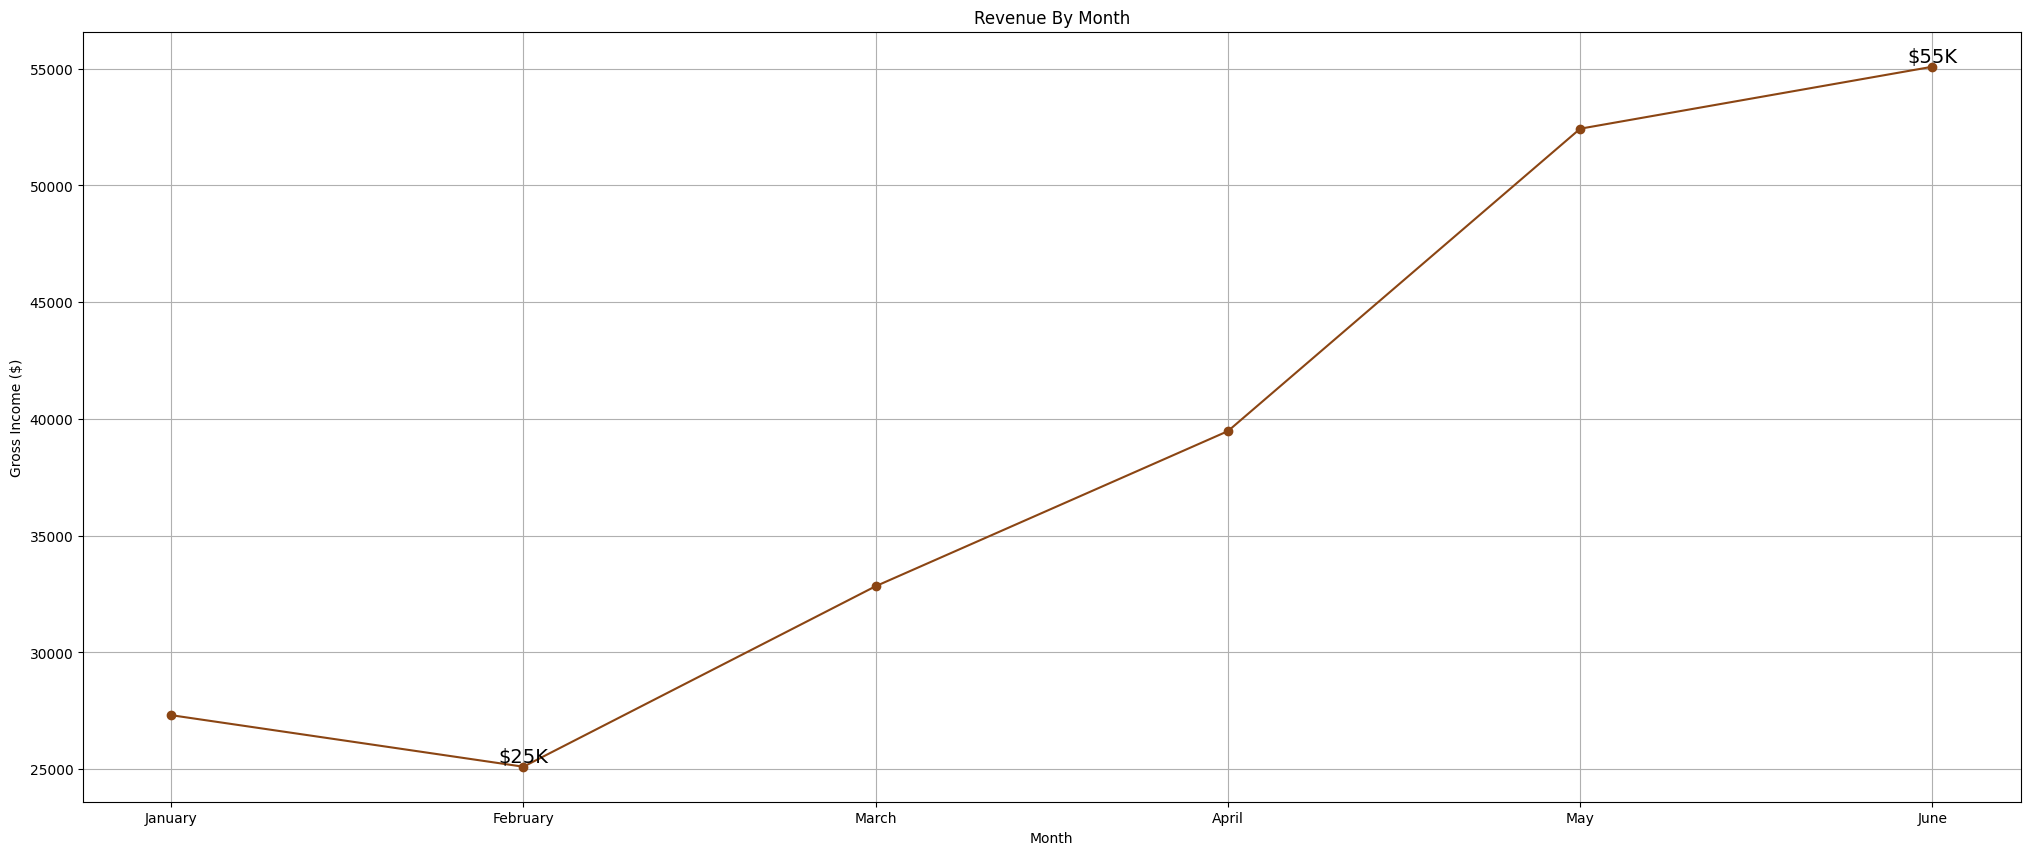

In [20]:
# Menentukan urutan bulan
bulan_urutan = ['January', 'February', 'March', 'April', 'May', 'June']

# Mengelompokkan total penjualan berdasarkan bulan
total_penjualan_per_bulan = df.groupby('Month Name', observed=True)['Total_Bill'].sum()

# Membuat plot line
plt.figure(figsize=(25, 10))
plt.plot(bulan_urutan, total_penjualan_per_bulan[bulan_urutan], marker='o', color='#8B4513')
plt.title('Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Gross Income ($)')
plt.grid(True)

# Menemukan nilai tertinggi dan terendah
nilai_tertinggi = total_penjualan_per_bulan.max()
bulan_tertinggi = total_penjualan_per_bulan.idxmax()
nilai_terendah = total_penjualan_per_bulan.min()
bulan_terendah = total_penjualan_per_bulan.idxmin()

nilai_tertinggi_str = '${:,.0f}K'.format(nilai_tertinggi / 1000)
nilai_terendah_str = '${:,.0f}K'.format(nilai_terendah / 1000)

# Menambahkan label ke titik tertinggi dan terendah
plt.text(bulan_tertinggi, nilai_tertinggi, nilai_tertinggi_str, ha='center', va='bottom', fontsize=14)
plt.text(bulan_terendah, nilai_terendah, nilai_terendah_str, ha='center', va='bottom', fontsize=14)


plt.savefig('revenue.png')
# Menampilkan plot
plt.show()

Line plot gross profit coffee shop menampilkan profit setiap bulan. Profit terendah terjadi pada bulan Februari sebesar `$25.105,34`, sementara profit tertinggi terjadi pada bulan Juni sebesar `$55.083,11`. Meskipun terjadi penurunan pada bulan Februari, penjualan coffee shop tetap menunjukkan tren positif setelahnya.

## Bagaimana distribusi data, rata-rata, modus, dan median harga tiap produk?

Perhitungan ini bertujuan untuk mengidentifikasi distribusi pada kolom. Hasil perhitungan ini akan menjadi acuan untuk menentukan metode analisis inferensial yang akan digunakan.

In [21]:
# Central tendency kolom harga setiap produk
print('Rata-rata unit_price:',df['unit_price'].mean().round(2))
print('Median unit_price:',df['unit_price'].median())
print('Modus unit_price:',df['unit_price'].mode().values[0])
print('Skewness unit_price',df['unit_price'].skew())
print('Kurtosis unit_price',df['unit_price'].kurtosis())

Rata-rata unit_price: 3.38
Median unit_price: 3.0
Modus unit_price: 3.0
Skewness unit_price 8.532051824613182
Kurtosis unit_price 99.23147540550113


- Skewness pada kolom `unit_price` menunjukan `Positive Skew` dengan nilai `8.53` yang berarti distribusi pada data `Highly skewed`
- Kurtosis pada kolom `unit_price` menunjukan `Leptokurtic distribution` dengan nilai `99.23` yang berarti data memiliki outliers yang banyak atau memiliki extrime value 
- `unit_price` memiliki skewness yang lebih dari `1` maka untuk mendeteksi outliers dapat mengunakan teknik `Tukey's Rule`

<Axes: ylabel='Frequency'>

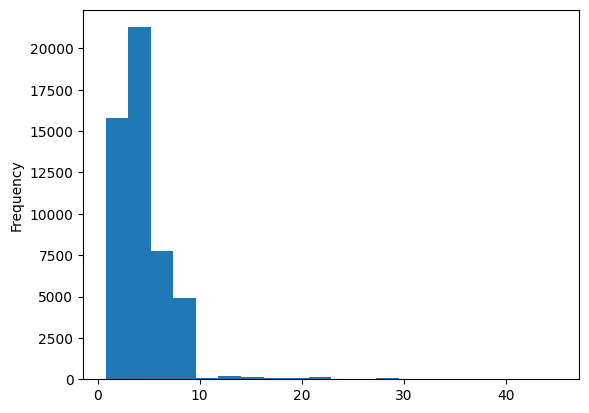

In [22]:
# Membuat plot untuk melihat outlier dan sebaran data
df['Total_Bill'].plot(kind='hist',bins=20)

- terbukti bahwah harga tiap produk terdistribusi tidak normal dan memiliki outlier dan extreme value serta adanya outlier.

In [23]:
# Mencari outlier pada kolom harga produk
q1 = df['unit_price'].quantile(0.25)
q3 = df['unit_price'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + (1.5*iqr)
low_bound = q1 - (1.5*iqr)

outlier = df['unit_price'][(df['unit_price']<low_bound) | (df['unit_price']>up_bound)]
no_outlier = df['unit_price'][(df['unit_price']>=low_bound) & (df['unit_price']<=up_bound)]


print(f'Upper Boundary unit_price: {up_bound:.2f}' )
print(f'Lower Boundary unit_price: {low_bound:.2f}')
print(f'jumlah outlier :{len(outlier)}')
print(f'jumlah bukan outlier :{len(no_outlier)}')
print('Persentase outlier dalam data kolom unit_price:', len(outlier)/df.shape[0]*100, '%')

Upper Boundary unit_price: 5.62
Lower Boundary unit_price: 0.62
jumlah outlier :1235
jumlah bukan outlier :49364
Persentase outlier dalam data kolom unit_price: 2.440759698808277 %


- Presentase Outlier pada data sebesar `2.44 %` atau tergolong kecil, outlier yang ada akan di abaikan.


## Bagaimana distribusi data, rata-rata, modus, dan median transaksi tiap produk?

Perhitungan ini bertujuan untuk mengidentifikasi distribusi pada kolom. Hasil perhitungan ini akan menjadi acuan untuk menentukan metode analisis inferensial yang akan digunakan.

In [24]:
# Menghitung central tendency, kurtosis, dan skewness
print('Rata-rata transaction_qty:',df['transaction_qty'].mean().round(2))
print('Median transaction_qty:',df['transaction_qty'].median())
print('Modus transaction_qty:',df['transaction_qty'].mode().values[0])
print('Skewness transaction_qty',df['transaction_qty'].skew())
print('Kurtosis transaction_qty',df['transaction_qty'].kurtosis())

Rata-rata transaction_qty: 1.4
Median transaction_qty: 1.0
Modus transaction_qty: 1
Skewness transaction_qty 0.39547539619749555
Kurtosis transaction_qty -1.843672086419541


- Skewness pada kolom `transaction_qty` menunjukkan nilai `0.39`, yang menandakan adanya kecenderungan distribusi yang cenderung simetris.
- Kurtosis pada kolom `transaction_qty` menunjukkan nilai `-1.84`, mengindikasikan distribusi yang datar atau platykurtic, yang dapat menunjukkan adanya sedikit outlier atau nilai ekstrem dalam data.

<Axes: ylabel='Frequency'>

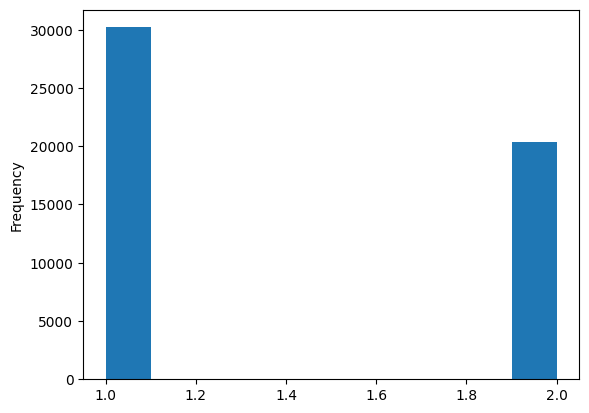

In [25]:
# Membuat plot untuk melihat outlier
df['transaction_qty'].plot(kind='hist')

- Sebaran data pada kolom 'transaction_qty' terbukti cenderung simetris.

In [26]:
# Mencari outlier pada kolom transction_qty
q1 = df['transaction_qty'].quantile(0.25)
q3 = df['transaction_qty'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + (1.5*iqr)
low_bound = q1 - (1.5*iqr)

outlier = df['transaction_qty'][(df['transaction_qty']<low_bound) | (df['transaction_qty']>up_bound)]
no_outlier = df['transaction_qty'][(df['transaction_qty']>=low_bound) & (df['transaction_qty']<=up_bound)]


print(f'Upper Boundary transaction_qty: {up_bound:.2f}' )
print(f'Lower Boundary transaction_qty: {low_bound:.2f}')
print(f'jumlah outlier :{len(outlier)}')
print(f'jumlah bukan outlier :{len(no_outlier)}')
print('Persentase outlier dalam data kolom transaction_qty:', len(outlier)/df.shape[0]*100, '%')

Upper Boundary transaction_qty: 3.50
Lower Boundary transaction_qty: -0.50
jumlah outlier :0
jumlah bukan outlier :50599
Persentase outlier dalam data kolom transaction_qty: 0.0 %


Jumlah outlier pada kolom transaction_qty tidak ada dikarenakan value yang ada hanyalah 1 dan 2

## Adakah perbedaan transaksi yang signifikan antara kategori produk?

### Uji Hipotesis apakah ada perbedaan transaksi antarkategori produk?

Hipotesis:

    H0 : Tidak ada perbedaan transaksi antara setiap kategori produk
    H1 : Ada perbedaan transaksi antara setiap kategori produk

Uji ini akan menggunakan ANOVA karena uji dilakukan dalam kolom yang memiliki lebih dari 2 unique value

In [27]:
# Memperlihatkan mean setiap kategori berdasarkan jumlah transaksi
df.groupby('product_category')['transaction_qty'].mean()

product_category
Bakery                1.028399
Branded               1.000000
Coffee                1.480899
Coffee beans          1.000000
Drinking Chocolate    1.476977
Flavours              1.480537
Loose Tea             1.000000
Packaged Chocolate    1.000000
Tea                   1.478967
Name: transaction_qty, dtype: float64

In [28]:
categories = ['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours',
              'Loose Tea', 'Packaged Chocolate', 'Branded', 'Coffee beans']

# Menghitung mean untuk setiap kategori produk
mean = df.groupby('product_category')['transaction_qty'].mean()

# Mengambil data transaksi untuk setiap kategori produk
data_for_anova = [df[df['product_category'] == category]['transaction_qty'] for category in mean.index]

# ANOVA
res = stats.f_oneway(*data_for_anova)

# Print hasil P-value
print('P-value:', res.pvalue)

P-value: 0.0


Nilai P-value lebih kecil dari 0.05 maka tolak `H0`, yang berarti adanya perbedaan transaksi antara setiap kategori produk

## Kategori produk mana yang paling diminati pelanggan?

In [29]:
# Mengkategorikan total transaksi pada kategori produk
df.groupby('product_category')['transaction_qty'].sum().sort_values()

product_category
Packaged Chocolate    110  
Branded               279  
Loose Tea             344  
Coffee beans          502  
Flavours              2206 
Drinking Chocolate    6351 
Bakery                7496 
Tea                   24048
Coffee                29655
Name: transaction_qty, dtype: int64

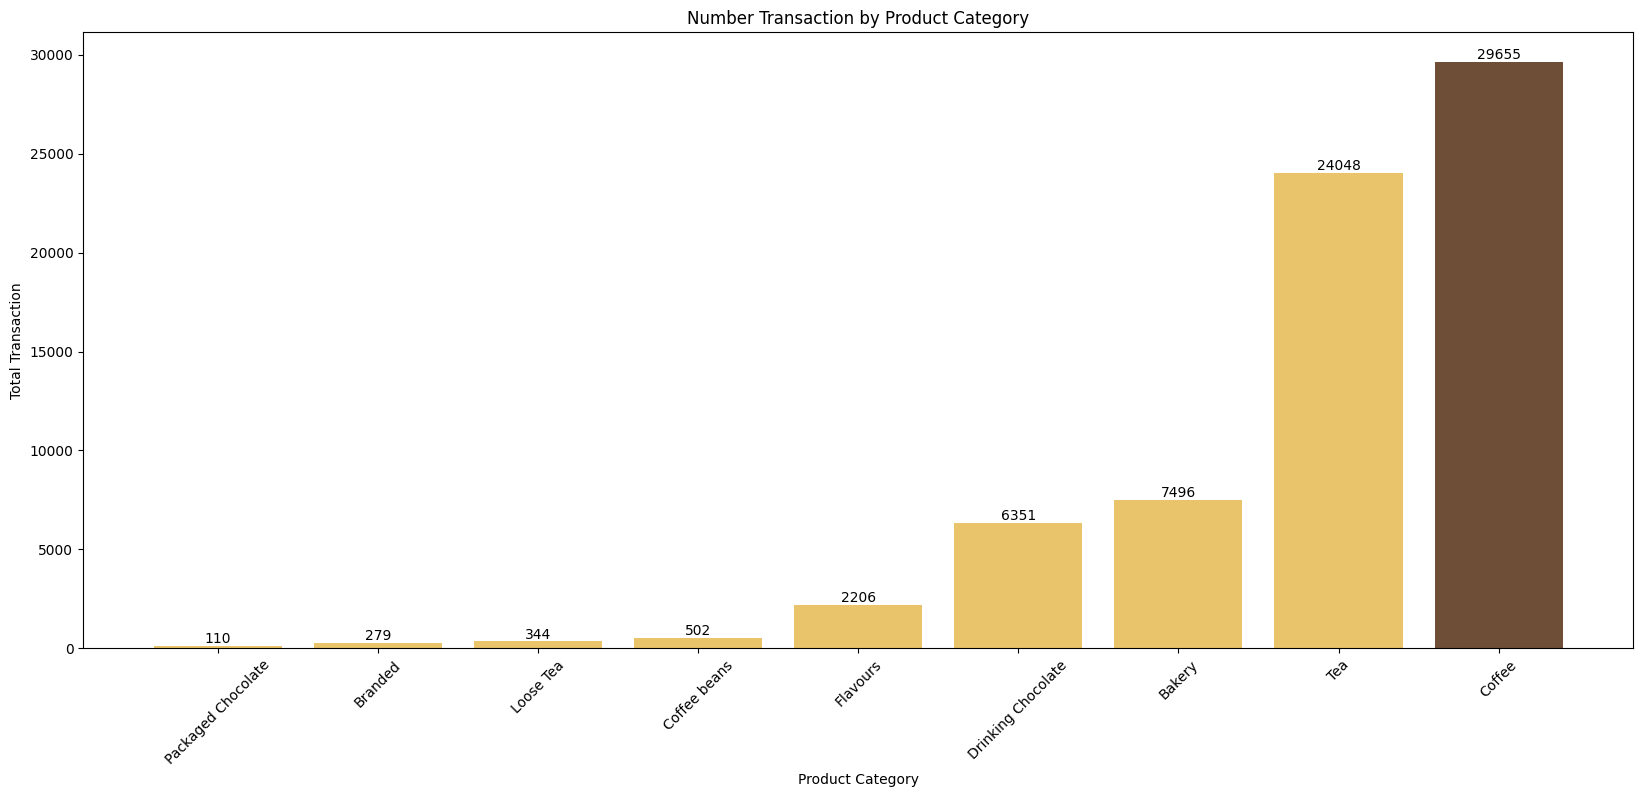

In [30]:
# Menghitung total penjualan per kategori produk
total_penjualan_per_kategori = df.groupby('product_category')['transaction_qty'].sum().sort_values()

# Menentukan kategori dengan penjualan tertinggi
kategori_tertinggi = total_penjualan_per_kategori.idxmax()

# Membuat plot bar
plt.figure(figsize=(20, 8))
colors = ['#E9C46A' if kategori != kategori_tertinggi else '#6F4E37' for kategori in total_penjualan_per_kategori.index]
bars = plt.bar(total_penjualan_per_kategori.index, total_penjualan_per_kategori, color=colors)
plt.title('Number Transaction by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Transaction')
plt.xticks(rotation=45)
# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.savefig('product_categori.png')

plt.show()

Berdasarkan pada barplot yang ada kategori produk yang paling diminati para pelanggan adalah kategori coffee dengan total transaksi yang ada sebesar `29655` dan kategori pakaged chocolate adalah kategori yang kurang diminati oleh para pelanggan dengan total transaksi sebesar `110`.

## Apakah pelanggan cenderung membeli produk yang murah?

### Uji hipotesis apakah customers cenderung membeli product yang murah

- **HO** Harga produk tidak berpengaruh dengan pembelian
- **H1** Harga produk berpengaruh dengan pembelian 
- Dalam analisis ini saya ingin mencari tau apakah ada korelasi antar harga produk dan penjualan 
- Harga produk memiliki skewness positif data tidak terdistribusi normal, untuk mencari hubungan antara kedua variabel uji `Spearman` lebih tepat digunakan.

In [31]:
# Uji korelasi spearman
corr_r, pval_p = stats.spearmanr(df['unit_price'],df['transaction_qty'])
print('r-correlation: ' , corr_r)
print('P-value: ', pval_p)

r-correlation:  -0.13165980427817914
P-value:  2.032138337186032e-194


Berdasarkan r-correlation korelasi dan p-value antara `unit_price` dan `transaction_qty`:
    
- Korelasi termasuk dalam negative correlation dimana jika salah satu variable naik, variablenya akan menurun.

- Nilai korelasi lebih mendekati dengan 0 dibandingkan lebih dekat dengan 1 maka hubungan antara harga produk dengan penjualan dapat dikatakan rendah.

- Nilai p-value lebih kecil dari tingkat signifikansi 0.05, maka H0 ditolak dimana harga produk tetap berpengaruh terhadap pembelian.

## Produk apa yang paling diminati di coffee shop Astoria berdasarkan data penjualan?

In [32]:
# filter tipe produk berdasarkan banyak transaksi
df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False)

product_detail
Columbian Medium Roast          4650
Our Old Time Diner Blend        4623
Jamaican Coffee River           4451
Ethiopia                        4420
Brazilian                       4344
Dark chocolate                  3281
Earl Grey                       3194
Spicy Eye Opener Chai           3191
Morning Sunrise Chai            3174
Peppermint                      3150
Sustainably Grown Organic       3133
Traditional Blend Chai          3061
Latte                           3057
Serenity Green Tea              2940
Lemon Grass                     2900
Cappuccino                      2851
English Breakfast               2782
Espresso shot                   1437
Chocolate Croissant             1023
Jumbo Savory Scone              700 
Cranberry Scone                 685 
Chocolate syrup                 670 
Hazelnut Biscotti               664 
Oatmeal Scone                   653 
Chocolate Chip Biscotti         652 
Ginger Scone                    648 
Ginger Biscotti        

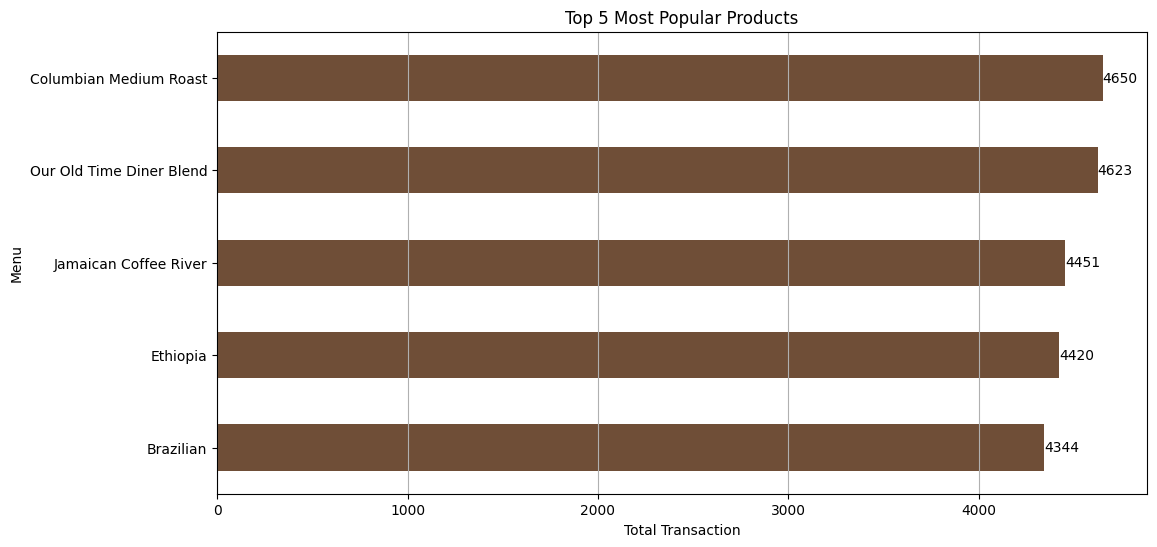

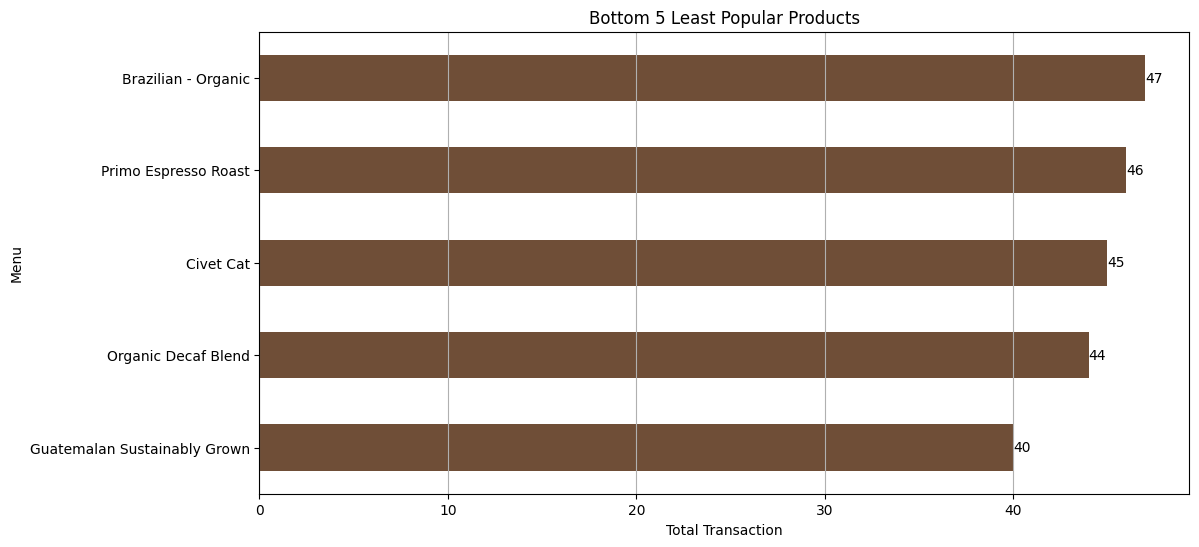

In [33]:
# Transaksi per menu
menuTransaction = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=True)

# Bagi DataFrame menjadi dua DataFrame terpisah: 5 teratas dan 5 terbawah
top_5 = menuTransaction.tail(5)
bottom_5 = menuTransaction.head(5)

# Plot 5 teratas
plt.figure(figsize=(12, 6))
top_5.plot(kind='barh', color='#6F4E37')
plt.title('Top 5 Most Popular Products')
plt.xlabel('Total Transaction')
plt.ylabel('Menu')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.savefig('top 5.png')

# Menambahkan nilai di sebelah kanan setiap bar
for index, value in enumerate(top_5):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()

# Plot 5 terbawah
plt.figure(figsize=(12, 6))
bottom_5.plot(kind='barh', color='#6F4E37')
plt.title('Bottom 5 Least Popular Products')
plt.xlabel('Total Transaction')
plt.ylabel('Menu')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.savefig('bot 5.png')
# Menambahkan nilai di sebelah kanan setiap bar
for index, value in enumerate(bottom_5):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)



plt.show()



Berdasarkan visualisasi data, menu yang paling laris terjual adalah 'Colombian Medium Roast' dengan total transaksi selama 6 bulan mencapai 4.650. Sedangkan 'Guatemalan Sustainably Grown' adalah produk yang paling kurang diminati, dengan total transaksi selama 6 bulan hanya sebesar 40.

## Kapan waktu pembelian paling sering dan paling sepi di coffee shop Astoria?

In [34]:
# Mengelompokan transaksi berdasarkan waktu
df.groupby('Hour')['transaction_qty'].sum()

Hour
7     5865
8     6756
9     7055
10    7388
11    4892
12    4955
13    4894
14    4661
15    4754
16    4982
17    4909
18    4894
19    4986
Name: transaction_qty, dtype: int64

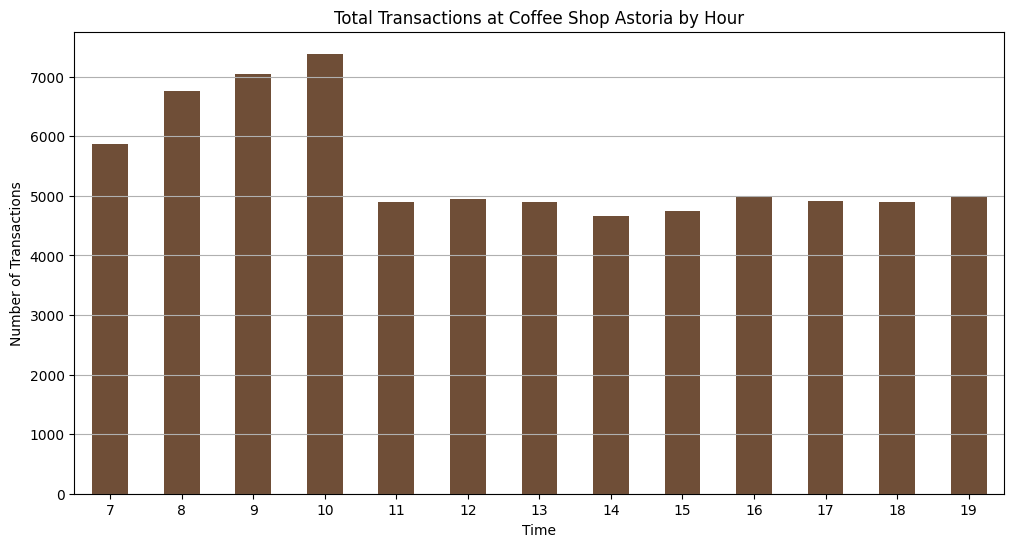

In [35]:
# Hitung frekuensi transaksi untuk setiap jam
transaksi_per_jam = df.groupby('Hour')['transaction_qty'].sum()

# Plot hasilnya
plt.figure(figsize=(12, 6))
transaksi_per_jam.plot(kind='bar', color='#6F4E37')
plt.title('Total Transactions at Coffee Shop Astoria by Hour')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('transaction.png')
plt.show()


Berdasarkan visualisasi data, jam paling ramai terjadi pada pagi hari, jam 10 pagi merupakan jam paling ramai. Sedangkan jam yang paling sepi adalah jam 14.

## Hari apa yang paling ramai di coffee shop?

In [36]:
# Mengelompokan total transaksi penjualan berdasarkan hari
df.groupby('Day Name')['transaction_qty'].sum()

Day Name
Friday       10342
Monday       10362
Saturday     9720 
Sunday       9981 
Thursday     10384
Tuesday      9743 
Wednesday    10459
Name: transaction_qty, dtype: int64

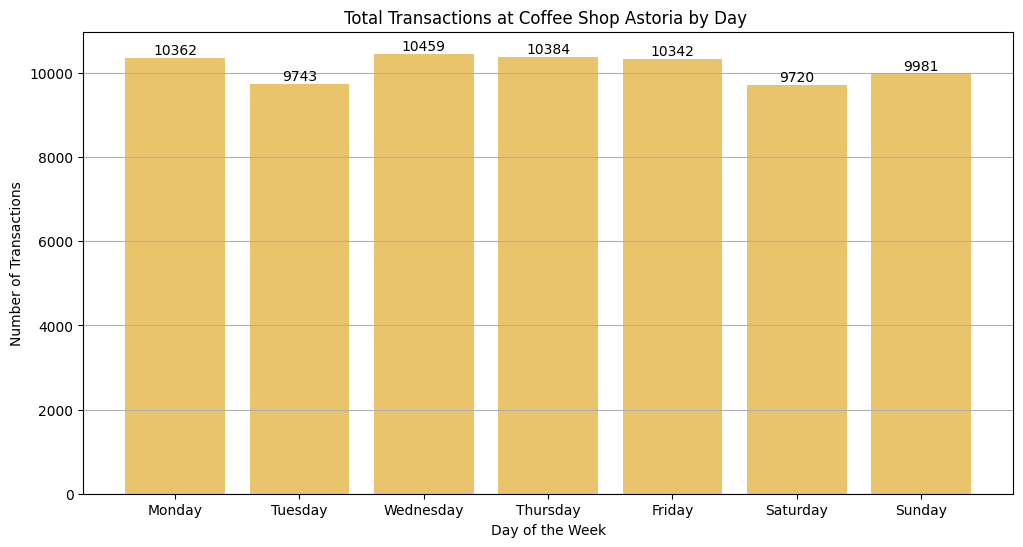

In [37]:
# Hitung frekuensi transaksi untuk setiap hari
transaksi_per_hari = df.groupby('Day Name')['transaction_qty'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot hasilnya
plt.figure(figsize=(12, 6))
bars = plt.bar(transaksi_per_hari.index, transaksi_per_hari, color='#E9C46A')
plt.title('Total Transactions at Coffee Shop Astoria by Day ')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)
plt.savefig('day.png')
plt.show()


Penjualan paling tinggi terjadi pada hari `Rabu`, sementara penjualan terendah terjadi pada hari `Sabtu`. Namun, perlu diperhatikan bahwa selisih antara penjualan di setiap hari tidak terlalu signifikan, dengan rata-rata transaksi harian minimal `9.000`.

## Size cup apa yang paling diminati pelanggan?

In [38]:
# Mengelompokan data berdasarkan size cup
df.groupby('Size')['transaction_qty'].sum()

Size
Large          23820
Not Defined    15344
Regular        24371
Small          7456 
Name: transaction_qty, dtype: int64

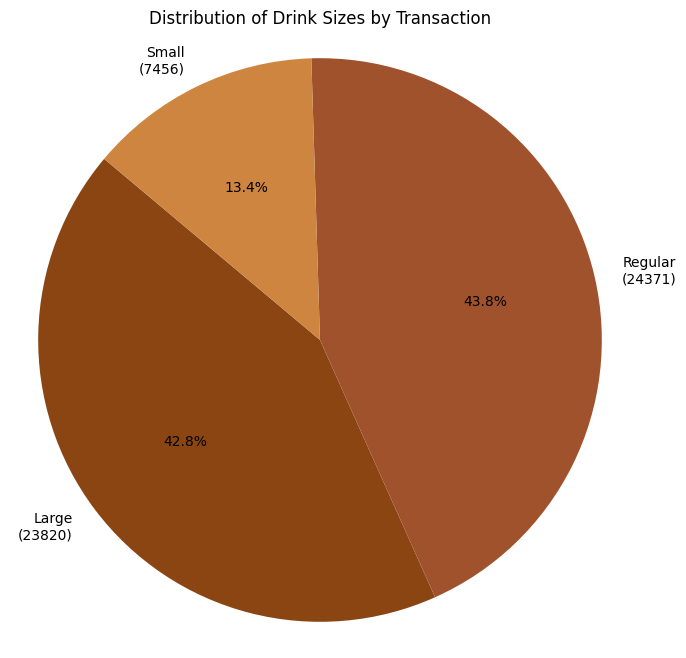

In [39]:
drinksSize = df.groupby('Size')['transaction_qty'].sum()
# Melakukan drop pada value Not Defined
drinksSize = drinksSize.drop(labels=['Not Defined'])


colors = ['#8B4513', '#A0522D', '#CD853F', '#D2691E']

# Membuat pie chart
plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(drinksSize, labels=drinksSize.index, startangle=140, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Drink Sizes by Transaction')
plt.axis('equal')  # Menyamakan skala sumbu x dan y agar pie chart berbentuk lingkaran

# Menambahkan nilai jumlah quantity per size di dalam setiap bagian pie chart
for i, text in enumerate(texts):
    percentage = drinksSize.iloc[i]
    text.set_text(f'{drinksSize.index[i]}\n({percentage})')
plt.savefig('drink.png')
plt.show()


Ukuran cup yang paling diminati dalam data adalah regular, sedangkan yang kurang diminati adalah ukuran small.

# Kesimpulan

Berdasarkan analisis yang dilakukan, berikut adalah kesimpulan serta rekomendasi untuk meningkatkan pendapatan Coffee Shop Astoria:

1. **Analisis Penjualan**: Ditemukan bahwa penjualan tertinggi terjadi pada hari Rabu, dengan penurunan pada hari Sabtu. Meskipun demikian, variasi antara hari-hari tidak signifikan, dengan rata-rata transaksi harian sekitar 9.000. Jam paling ramai terjadi pada pagi hari pada jam 10 pagi, sementara jam 14 merupakan waktu paling sepi. Ini menunjukkan potensi untuk meningkatkan promosi pada jam-jam sibuk dan mengembangkan strategi untuk menarik pelanggan pada hari-hari yang cenderung sepi.

2. **Analisis Produk**: Produk yang paling diminati adalah "Colombian Medium Roast" dengan jumlah transaksi tertinggi, sementara "Guatemalan Sustainably Grown" adalah produk yang paling kurang diminati. Ini mengindikasikan perlunya evaluasi terhadap produk yang kurang diminati dan pengembangan menu baru yang menarik untuk meningkatkan minat pelanggan.

3. **Analisis Harga**: Meskipun ada korelasi negatif antara harga produk dan jumlah penjualan, harga produk masih mempengaruhi pembelian. Oleh karena itu, strategi penetapan harga perlu diperhatikan dengan cermat untuk menjaga keseimbangan antara keuntungan dan minat pelanggan.

4. **Implementasi Strategi**: Untuk meningkatkan pendapatan sebesar 10% dalam 3 bulan ke depan, beberapa langkah implementasi dapat dilakukan:
   - Pengembangan Menu Baru: Berdasarkan analisis produk, pengenalan menu baru yang menarik dan sesuai dengan selera pelanggan dapat meningkatkan minat pembelian.
   - Promosi Efektif: Menggunakan analisis tentang jam sibuk dan hari penjualan tertinggi, promosi dapat diprioritaskan pada saat-saat strategis untuk meningkatkan kunjungan pelanggan.
   - Evaluasi Harga: Melakukan evaluasi terhadap harga produk untuk memastikan penentuan harga yang optimal, menyesuaikan dengan kebutuhan pasar dan memberikan insentif untuk pembelian.
   - Manajemen Stok: Memastikan ketersediaan produk yang diminati dan mengurangi stok produk yang kurang diminati untuk mengoptimalkan ruang penyimpanan dan menghindari pemborosan.

Dengan implementasi strategi ini, diharapkan Coffee Shop Astoria dapat mencapai peningkatan pendapatan yang signifikan dalam jangka waktu yang ditetapkan.